# Plotting the datapoints of croplabd, without any modelling

## Imports

In [1]:
import set_lib_path

import os
import pandas as pd
import seaborn as sns

from src.model.data_mappings import filter_counts, get_input_counts_for_data_source_cells, interpolate_missing_counts, load_counts_data
from src.model.datasources import DataSourceCell
from src.model.street_grid.street_segments import load_street_segments

## File locations

In [2]:
data_path = '../../../data'
main_path = os.path.join(data_path, 'managed_data_files/test_set_bigger')
input_path = os.path.join(main_path, 'input')
output_path = os.path.join(main_path, 'output')

street_segments_path = os.path.join(input_path, 'street_segments.csv')
counts_path = os.path.join(input_path, 'counts', 'data.csv')

Load Street segments

In [3]:
street_segments = load_street_segments(street_segments_path)
street_segments

,street_segment_id,street_object_id,street_segment_length,street_object_length,data_source,data_source_index,is_edge,street_segment_geometry,street_object_geometry
0,1,74781,77.822009,77.822009,cropland,145558,False,"LINESTRING (4.30938 51.29901, 4.30942 51.29904...","LINESTRING (4.30938041958061 51.2990122787954,..."
1,2,403166,399.674433,739.601401,cropland,145558,False,"LINESTRING (4.30477 51.30089, 4.30514 51.30074...","LINESTRING (4.30476589886157 51.3008871402769,..."
2,3,403166,167.316882,739.601401,cropland,145559,False,"LINESTRING (4.30946 51.29883, 4.30961 51.29876...","LINESTRING (4.30476589886157 51.3008871402769,..."
3,5,403176,184.572662,184.572662,cropland,145558,False,"LINESTRING (4.30529 51.30085, 4.30555 51.30074...","LINESTRING (4.30528985893031 51.3008509989579,..."
4,6,403177,166.495813,166.495813,cropland,145558,False,"LINESTRING (4.30744 51.29989, 4.30750 51.29986...","LINESTRING (4.30744136702467 51.2998851527326,..."
...,...,...,...,...,...,...,...,...,...
87,111,1123639,31.492867,31.492867,cropland,145058,False,"LINESTRING (4.29994 51.30309, 4.30014 51.30284)","LINESTRING (4.29994037653789 51.3030944334207,..."
88,112,1123640,36.383843,36.383843,cropland,145058,False,"LINESTRING (4.30041 51.30305, 4.30054 51.30300...","LINESTRING (4.30041201138534 51.3030499545102,..."
89,113,1123641,38.424692,38.424692,cropland,145058,False,"LINESTRING (4.30059 51.30264, 4.30044 51.30271...","LINESTRING (4.30059092190112 51.3026422598935,..."
90,114,1142863,377.834527,1436.391477,cropland,145558,False,"LINESTRING (4.30463 51.30077, 4.30476 51.30072...","LINESTRING (4.30463245562301 51.3007713988925,..."


Load counts

In [4]:
counts_data = load_counts_data(counts_path)
counts_data = interpolate_missing_counts(counts_data)
counts_data['modality'] = 'all'
counts_data.fillna(0, inplace=True)
counts_data = filter_counts(counts_data, street_segments)
counts_data

,timestamp,count,data_source,data_source_index,modality
0,2020-01-01 05:00:00+00:00,0.000000,cropland,145559,all
1,2020-01-01 06:00:00+00:00,0.000000,cropland,145559,all
2,2020-01-01 07:00:00+00:00,0.000000,cropland,145559,all
3,2020-01-01 05:00:00+00:00,96.252004,cropland,145058,all
4,2020-01-01 06:00:00+00:00,91.295026,cropland,145058,all
5,2020-01-01 07:00:00+00:00,96.135008,cropland,145058,all
6,2020-01-01 05:00:00+00:00,31.809875,cropland,145558,all
7,2020-01-01 06:00:00+00:00,34.120571,cropland,145558,all
8,2020-01-01 07:00:00+00:00,36.431267,cropland,145558,all
9,2020-01-01 05:00:00+00:00,0.000000,cropland,145059,all


## creating matrix like plotting structure

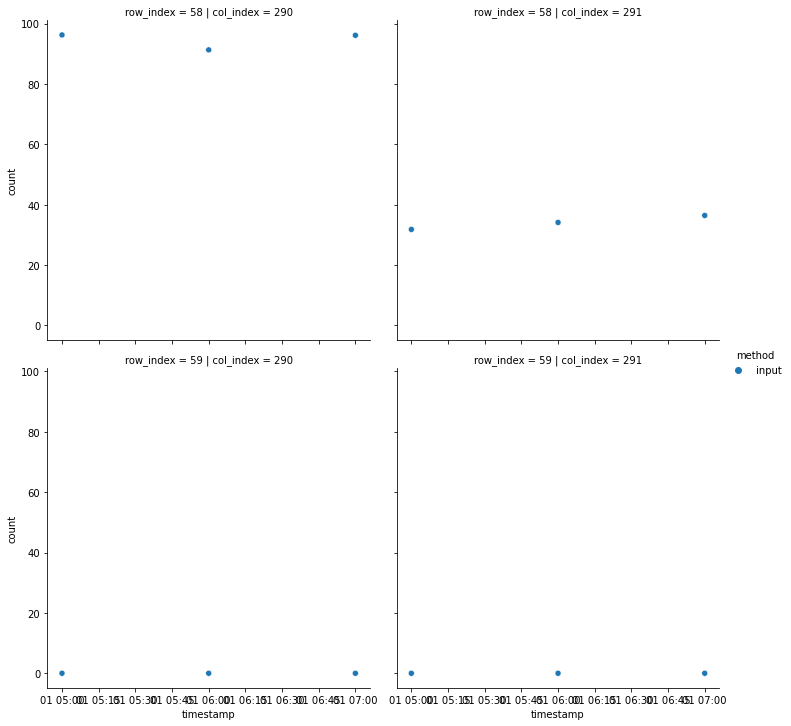

In [5]:
data_source_cells = [DataSourceCell('cropland', dsid) for dsid in counts_data['data_source_index'].unique()]


input_counts = get_input_counts_for_data_source_cells(counts_data, data_source_cells)
#computed_counts = get_computed_counts_for_data_source_cells(data, data_source_cells, street_segments)

input_counts['method'] = 'input'
#computed_counts['method'] = 'computed'
all_counts = pd.concat([input_counts])

data_source_index_int = all_counts['data_source_cell_index'].str.lstrip('cropland_').astype(int)
col_index, row_index = divmod(data_source_index_int, 500)
all_counts['row_index'] = row_index
all_counts['col_index'] = col_index

all_counts_filtered = all_counts #.loc[all_counts['timestamp'] >= '2020-01-01 05:00:00']

sns.relplot(data=all_counts_filtered, x='timestamp', y='count', row='row_index', col='col_index', hue='method')